# STAT 345 Prelim Exam One Solutions

You have 49.25 hours to do this exam, but it should only take $\lesssim$2 hours. You may use any books or notes you like, and any electronic devices with communication capabilities
switched off (airplane mode).  You may find it useful to use the wrapper [wilcoxdists.py](wilcoxdists.py) as well as the functionality of the Jupyter notebook.  You should not communicate with anyone or look anything up on the internet from the time you start the exam to the time you submit it.

Some problems contain boxes ($\boxed{\color{brown}{????}}$) into which you should place your final
answer. Express all numerical results to at least three decimal places.

The exam contains three problems worth a total of 50 points. Try not to
spend too much time on any one problem. The weight of each part of each
problem is listed, as is the total weight for each problem. Later parts
of a problem may or may not depend on some, but not all, of the previous
parts.

**Show your work!**

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## 1. Election Polling (13 points total)

A ballot initiative requires a 60% supermajority to pass. A
polling firm conducts a straw poll of 80 voters (assumed to be a
representative sample of the electorate), to determine whether the
initiative is likely to pass.

**(a)** \[4pts\] If they wish to construct a test of significance
    $\alpha\le 0.05$, what threshold should they use?  

<font color="brown">
Since we’re looking for evidence that the initiative will pass, the
    null hypothesis $H_0$ is that the proportion of voters in the
    overall electorate in favor of it is 60% or less, and the
    alternative hypothesis $H_1$ is that this proportion is more than
    60%. We need to find a threshold so that, if the true proportion
    is 60%, there is no more than a 5% chance of finding that number
    or fewer in a sample of 80 voters. This is easiest to do if we just
    look for the 95th percentile of a $\operatorname{Bin}(80,0.6)$
    distribution using Python:
</font>

In [3]:
stats.binom(80,0.6).ppf(0.95)

55.0

<font color="brown">
    We can check and see that the probability of getting more than 55 in
    favor is 4.2%, while that for more than 54 is $6.7\%$, so the
    threshold should be 55:
</font>

In [4]:
stats.binom(80,0.6).sf(55)

0.04174732072326437

In [5]:
stats.binom(80,0.6).sf(54)

0.06746429596974945

$$
\hbox{The initiative is likely to pass if more than}\quad\boxed{\color{brown}{55}}\quad\hbox{respondents plan to vote for it.}
$$

**(b)** \[5pts\] Construct and plot the power curve for the test in part (a), for actual support in the electorate at large between 60% and 100%.

<font color="brown">
Now we want to know the probability of getting more than 55 supporters out of a sample of 80, as a function of the true proportion.  Again, this is the survival function:
</font>

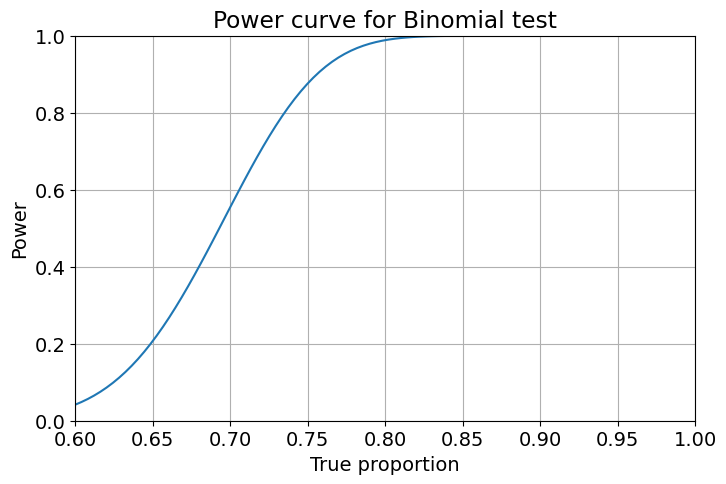

In [6]:
p_p = np.linspace(0.6,1,100)
gamma_p = stats.binom(80,p_p).sf(55)
plt.plot(p_p,gamma_p);
plt.title('Power curve for Binomial test');
plt.xlabel('True proportion');
plt.ylabel('Power');
plt.xlim(0.6,1);
plt.ylim(0,1);
plt.grid(True);

<font color="brown">
We can check that $\gamma(0.6)=\alpha$
</font>

In [7]:
print('gamma(%g)=%g' % (p_p[0],gamma_p[0]))

gamma(0.6)=0.0417473


**(c)** \[4pts\] If the results of the poll are that 60 of the respondents are
    in favor of the initiative, what is the $p$-value?

<font color="brown">
    Now we need the probability of finding 60 or more respondents in
    favor, if the true proportion is $0.6$.
</font>

In [8]:
stats.binom(80,0.6).sf(60-0.5)

0.0035612985974640913

$$\hbox{$p$-value} = \boxed{\color{brown}{0.00356}}$$

## 2. Sign Test and Median Confidence Interval (17 points total)

Consider a sample of size $n=10$ drawn from a continuous distribution.

**(a)** \[2pts\] If we construct the one-sample sign test for a hypothesized median value, what are the minimum and maximum possible values of the test statistic ${\color{royalblue}{N_{+}}}$?

<font color="brown">
    Since there are $n=10$ values, the number of positive values in the one-sample sign test can be between 0 and 10.
</font>

$$\hbox{Minimum possible $n_+$} = \boxed{\color{brown}{0}}$$

$$\hbox{Maximum possible $n_+$} = \boxed{\color{brown}{10}}$$

**(b)** \[2pts\] What is the median of the distribution of ${\color{royalblue}{N_{+}}}$, assuming the null hypothesis?

<font color="brown">
    Since the null hypothesis, that the median is in fact the hypothesis value, implies that each observation is equally likely to be above or below the hypthesized value, which means that the test statistic is a binomial random variable, ${\color{royalblue}{N_{+}}}\sim\operatorname{Bin}(n,0.5)$.  This is a symmetric distribution with a median equal to its mean, $\frac{n}{2}=5$.
</font>

$$\boxed{\color{brown}{5}}$$

**(c)** \[4pts\] Again assuming the null hypothesis, find a value $n_\ell$ such that $P({\color{royalblue}{N_{+}}}\mathbin{\le} n_\ell)$ is between $0.05$ and $0.055$, and calculate the actual value of $P({\color{royalblue}{N_{+}}}\mathbin{\le} n_\ell)$.

<font color="brown">
    We're looking for roughly the 5th percentile of the binomial distribution:
</font>

In [9]:
n = 10
stats.binom(n,0.5).ppf(0.05)

2.0

<font color="brown">
We can see that $P({\color{royalblue}{N_{+}}}\mathbin{\le} 1)\approx 0.0107$, $P({\color{royalblue}{N_{+}}}\mathbin{\le} 2)\approx 0.0547$, and $P({\color{royalblue}{N_{+}}}\mathbin{\le} 3)\approx 0.1719$, so $n_\ell=2$ is the only possibility:
</font>

In [10]:
stats.binom(n,0.5).cdf(1)

0.0107421875

In [11]:
stats.binom(n,0.5).cdf(2)

0.0546875

In [12]:
stats.binom(n,0.5).cdf(3)

0.171875

$$P({\color{royalblue}{N_{+}}}\mathbin{\le} \boxed{\color{brown}{2}}) = \boxed{\color{brown}{0.0546875}}$$

**(d)** \[3pts\] Again assuming the null hypothesis, find a value $n_u$ such that $P({\color{royalblue}{N_{+}}}\mathbin{\ge} n_u)$ is between $0.05$ and $0.055$, and calculate the actual value of $P({\color{royalblue}{N_{+}}}\mathbin{\ge} n_u)$.

<font color="brown">
By symmetry, we'd expect to find $n_u=10-2=8$, and in fact $P({\color{royalblue}{N_{+}}}\mathbin{\ge} 7)\approx 0.1719$, $P({\color{royalblue}{N_{+}}}\mathbin{\ge} 8)\approx 0.0547$, and $P({\color{royalblue}{N_{+}}}\mathbin{\ge} 9)\approx 0.0107$, so this is correct:
</font>

In [13]:
stats.binom(n,0.5).sf(7-0.5)

0.171875

In [14]:
stats.binom(n,0.5).sf(8-0.5)

0.0546875

In [15]:
stats.binom(n,0.5).sf(9-0.5)

0.0107421875

$$P({\color{royalblue}{N_{+}}}\mathbin{\ge} \boxed{\color{brown}{8}}) = \boxed{\color{brown}{0.0546875}}$$

**(e)** \[2pts\] Construct and display the order statistics of the following dataset:

In [16]:
d_i = np.array([25.5, 38.3, 33.4, 43.6, 43.4, 28.5, 28.6, 44.3, 52.8, 47.5])

<font color="brown">
This is just a matter of sorting the data:</font>

In [17]:
dsorted_i = np.sort(d_i); dsorted_i

array([25.5, 28.5, 28.6, 33.4, 38.3, 43.4, 43.6, 44.3, 47.5, 52.8])

**(f)** \[4pts\] Use the results of parts (a)-(d) to construct a nonparametric confidence interval on the median of the population from which the data in part (e) were drawn, with a confidence level between 89% and 90%, and state the actual confidence level.

<font color="brown">
To construct a confidence level on the median of confidence level $1-\alpha$, we should use the $r$th and $s$th order statistics, where
$$
P(r {\mathbin{\le}}{\color{royalblue}{Y}} {\mathbin{<}}s) = 1-\alpha
$$
for ${\color{royalblue}{Y}}\sim\operatorname{Bin}(n,0.5)$.  By symmetry, this means
$$
P({\color{royalblue}{Y}}{\mathbin{<}}r)=P({\color{royalblue}{Y}}{\mathbin{\le}}r-1) = \frac{\alpha}{2} = P({\color{royalblue}{Y}} {\mathbin{\ge}}s)
$$
Thus from parts (c) and (d), we see that we can achieve this with $\frac{\alpha}{2}=.0546875$ for $r-1=n_\ell=2$ and $s=n_u=8$.  I.e., we want the 3rd and 8th order statistics.  We note that these are also symmetrically spaced; there are two values below the lower end and two above the upper end:
</font>

In [18]:
dsorted_i[3-1],dsorted_i[8-1]

(28.6, 44.3)

In [19]:
1 - 2*stats.binom(n,0.5).cdf(2)

0.890625

$$\hbox{from}\quad\boxed{\color{brown}{28.6}}\quad\hbox{to}\quad\boxed{\color{brown}{44.3}}$$

$$\hbox{Confidence Level}=\boxed{\color{brown}{0.890625}}$$

## 3. Signed Rank Test and Median Confidence Interval (20 points total)

Consider a sample of size $n=10$.

**(a)** \[2pts\] If we construct the one-sample signed rank test for a hypothesized median value, what are the minimum and maximum possible values of the test statistic ${\color{royalblue}{T^{+}}}$ (the sum of the ranks of the positive differences)?

<font color="brown">
The minimum value is of course zero, and the maximum is the sum of all integers from 1 to 10, i.e., $\frac{10(11)}{2}=55$.
</font>

In [20]:
n = 10
np.sum(1+np.arange(n))

55

In [21]:
n*(n+1)//2

55

$$\hbox{Minimum possible $t^+$} = \boxed{\color{brown}{0}}$$

$$\hbox{Maximum possible $t^+$} = \boxed{\color{brown}{55}}$$

**(b)** \[2pts\] What is the median of the distribution of ${\color{royalblue}{T^{+}}}$, assuming the null hypothesis?

<font color="brown">
The null distribution for the signed rank statistic is more complicated, but it is still symmetric, so the median is $\frac{55}{2}=27.5$
</font>

In [22]:
55/2

27.5

$$\boxed{\color{brown}{27.5}}$$

**(c)** \[3pts\] Again assuming the null hypothesis, find a value $t_\ell$ such that $P({\color{royalblue}{T^{+}}}\mathbin{\le} t_\ell)$ is between $0.05$ and $0.055$, and calculate the actual value of $P({\color{royalblue}{T^{+}}}\mathbin{\le} t_\ell)$.

<font color="brown">
The easiest way to do this is to use the Python wrapper
</font>

In [23]:
from wilcoxondists import signrankcdf, signrankppf

<font color="brown">
We can see that $P({\color{royalblue}{T^{+}}}\mathbin{\le} 10)\approx 0.0420$, $P({\color{royalblue}{N_{+}}}\mathbin{\le} 11)\approx 0.0527$, and $P({\color{royalblue}{N_{+}}}\mathbin{\le} 12)\approx 0.0654$, so $t_\ell=11$ is the only possibility:
</font>

In [24]:
signrankppf(0.05,n)

11

In [25]:
signrankcdf(10,n)

0.0419921875

In [26]:
signrankcdf(11,n)

0.052734375

In [27]:
signrankcdf(12,n)

0.0654296875

$$P({\color{royalblue}{T^{+}}}\mathbin{\le} \boxed{\color{brown}{11}}) = \boxed{\color{brown}{0.052734}}$$

**(d)** \[2pts\] Again assuming the null hypothesis, find a value $t_u$ such that $P({\color{royalblue}{T^{+}}}\mathbin{\ge} t_u)$ is between $0.05$ and $0.055$, and calculate the actual value of $P({\color{royalblue}{T^{+}}}\mathbin{\ge} t_u)$.

<font color="brown">
By symmetry, we'd expect to find $t_u=55-11=44$, and in fact $P({\color{royalblue}{T^{+}}}\mathbin{\ge} 43)\approx 0.0654$, $P({\color{royalblue}{T^{+}}}\mathbin{\ge} 44)\approx 0.0527$, and $P({\color{royalblue}{T^{+}}}\mathbin{\ge} 45)\approx 0.0420$, so this is correct:
</font>

In [28]:
1-signrankcdf(43-1,n)

0.0654296875

In [29]:
1-signrankcdf(44-1,n)

0.052734375

In [30]:
1-signrankcdf(45-1,n)

0.0419921875

$$P({\color{royalblue}{T^{+}}}\mathbin{\ge} \boxed{\color{brown}{44}}) = \boxed{\color{brown}{0.0527}}$$

**(e)** \[3pts\] For the following the following dataset, construct and sort the list of averages $\{\frac{d_i+d_j}{2}\}$ where $j\ge i$, and display the sorted list.

In [31]:
d_i = np.array([25.5, 28.5, 28.6, 33.4, 38.3, 43.4, 43.6, 44.3, 47.5, 52.8])

<font color="brown">
We can do this with a list comprehension as in lesson 04.2:
</font>

In [32]:
from matplotlib.cbook import flatten
avgs_k = np.sort(np.array(list(flatten([[0.5*(d_i[i]+d_i[j]) for j in range(i,n)]
                                      for i in range(n)]))))
avgs_k

array([25.5 , 27.  , 27.05, 28.5 , 28.55, 28.6 , 29.45, 30.95, 31.  ,
       31.9 , 33.4 , 33.4 , 33.45, 34.45, 34.55, 34.9 , 35.85, 35.95,
       36.  , 36.05, 36.1 , 36.4 , 36.45, 36.5 , 38.  , 38.05, 38.3 ,
       38.4 , 38.5 , 38.85, 39.15, 40.45, 40.65, 40.7 , 40.85, 40.95,
       41.3 , 42.9 , 43.1 , 43.4 , 43.5 , 43.6 , 43.85, 43.95, 44.3 ,
       45.45, 45.55, 45.55, 45.9 , 47.5 , 48.1 , 48.2 , 48.55, 50.15,
       52.8 ])

<font color="brown">
Note that the number of averages, $\frac{n(n+1)}{2}$, is the same as the maximum value of the signed rank statistic.
</font>

In [33]:
len(avgs_k)

55

**(f)** \[4pts\] Use the results of parts (a)-(d) to construct a nonparametric confidence interval on the median of the population from which the data in part (e) were drawn, with a confidence level between 89% and 90%, and state the actual confidence level.

<font color="brown">
To make a confidence interval of confidence level $1-\alpha$ based on the signed rank statistic, we should use the $r$th and $s$th values in our sorted list of averages, where
$$
P(r {\mathbin{\le}}{\color{royalblue}{Y}} {\mathbin{<}}s) = 1-\alpha
$$
for ${\color{royalblue}{Y}}$ following the null distribution of the signed rank statistic.  By symmetry, this means
$$
P({\color{royalblue}{Y}}{\mathbin{<}}r)=P({\color{royalblue}{Y}}{\mathbin{\le}}r-1) = \frac{\alpha}{2} = P({\color{royalblue}{Y}} {\mathbin{\ge}}s)
$$
Thus from parts (c) and (d), we see that we can achieve this with $\frac{\alpha}{2}\approx 0.05273$ for $r-1=t_\ell=11$ and $s=t_u=44$.  I.e., we want the 12th and 44th values in the ordered list of averages.  We note that these are also symmetrically spaced; there are 11 values below the lower end and two above the upper end:
</font>

In [34]:
avgs_k[12-1],avgs_k[44-1]

(33.4, 43.95)

In [35]:
1 - 2*signrankcdf(11,n)

0.89453125

$$\hbox{from}\quad\boxed{\color{brown}{33.4}}\quad\hbox{to}\quad\boxed{\color{brown}{43.95}}$$

$$\hbox{Confidence Level}=\boxed{\color{brown}{0.8945}}$$

**(g)** \[2pts\] What additional assumption is made about the distribution, compared to the confidence interval in problem 2, part (f)?

<font color="brown">
The signed rank interval assumes the sampling distribution is symmetric.
</font>

**(h)** \[2pts\] Considering what you learned on the homework about the power of the hypothesis tests referenced in these two problems, how do you expect the typical widths of the confidence intervals, constructed at the same confidence level using the constructions of problem 2 and problem 3, to compare?  Specificially, which do you expect to be narrower, and why, in each of these cases:

**i)** For samples drawn from a normal distribution?

<font color="brown">
Since the construction of problem 2 is based on the sign test and that of problem 3 on the signed rank test, and since we saw on problem set 4 that the signed rank test is substantially more powerful than the sign test when the sampling distribution is normal, we expect the construction of problem 3 to give narrower intervals in general for samples drawn from a normal distribution.
</font>

**ii)** For samples drawn from a heavy-tailed distribution like the Laplace distribution?

<font color="brown">
Problem set 4 also showed that, for samples from the Laplace distribution, the sign test was slightly more powerful than the signed rank test, we expect that the interval construction in problem 2 will give **slightly** narrower intervals than problem 3 for samples drawn from heavy-tailed distributions.
</font>

<font color="brown">
Note that for the specific data on this exam, the signed-rank based confidence interval is narrower at a comparible confidence level.  This is not so surprising in light of the general robustness of the signed rank construction.
</font>